10:08:38 - cmdstanpy - INFO - Chain [1] start processing
10:08:38 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2021-08-06  547.506128  343.243657  762.050483   547.506128   547.506128   
1   2021-08-09  553.798398  356.381559  770.363592   553.798398   553.798398   
2   2021-08-10  555.895822  360.703134  774.277920   555.895822   555.895822   
3   2021-08-11  557.993245  382.972680  769.964833   557.993245   557.993245   
4   2021-08-12  560.090668  356.777799  790.982982   560.090668   560.090668   
..         ...         ...         ...         ...          ...          ...   
243 2022-07-21 -216.482875 -419.623257    5.921151  -255.232154  -177.822524   
244 2022-07-22 -226.836028 -427.330600   -0.905536  -269.292698  -184.034846   
245 2022-07-25 -257.895488 -469.048759  -42.171229  -313.919911  -201.894437   
246 2022-07-26 -268.248642 -478.576767  -47.578658  -329.861279  -206.704040   
247 2022-07-27 -278.601795 -475.712069  -47.986368  -344.971182  -212.075695   

     additive_terms  additive_terms_low

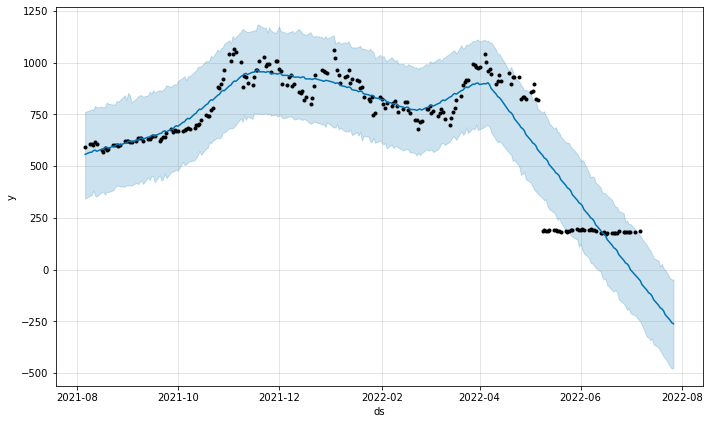

In [1]:
import pandas as pd
from prophet import Prophet


df = pd.read_csv('data.csv')

model = Prophet(interval_width=0.95, daily_seasonality=True, changepoint_prior_scale=0.5, seasonality_prior_scale=1, holidays_prior_scale=1)
m = model.fit(df)


future = m.make_future_dataframe(periods=20)
# Eliminate weekend from future dataframe
future['day'] = future['ds'].dt.weekday
future = future[future['day']<=4]

forecast = m.predict(future)


print(forecast)
plot1 = m.plot(forecast)